# Predicting Unemployment Rates with Machine Learning
Unemployment is a critical economic indicator that affects individuals, communities, and nations. Being able to accurately predict and understand unemployment rates can provide valuable insights for policymakers, businesses, and researchers. In this project, we leverage the power of machine learning to predict unemployment rates using a dataset that includes various factors such as region, date, and area.

step : 
    
* Dataset Exploration: We started by exploring the dataset, understanding its structure, and identifying the relevant features for predicting unemployment rates.

* Data Preprocessing: We performed necessary data preprocessing steps, such as handling missing values, converting date formats, and ensuring data consistency.

* Feature Selection: We selected the features that are most likely to have a significant impact on the unemployment rates based on domain knowledge and data analysis.

* Feature Scaling: Since the selected features may have different scales, we applied feature scaling techniques to normalize the data and ensure that all features contribute equally to the model's predictions.

* Model Training: We utilized a linear regression model to train on the preprocessed and scaled dataset. The linear regression model is a commonly used technique for predicting continuous values.

* Splitting the Data: We split the dataset into training and testing sets to evaluate the performance of the trained model accurately. The training set was used to train the model, while the testing set was used for model evaluation.

* Model Evaluation: We evaluated the trained model's performance on the testing dataset using evaluation metrics such as Mean Squared Error (MSE) and R-squared score. The MSE measures the average squared difference between the predicted and actual unemployment rates, while the R-squared score indicates how well the model fits the data.

* Results Analysis: We analyzed the evaluation results to assess the model's accuracy and performance. The low MSE and high R-squared score indicate that the model provided accurate predictions and achieved a good fit to the data.

* Future Possibilities: We discussed potential avenues for further improvement, such as incorporating additional relevant features, exploring advanced machine learning algorithms, or considering economic indicators and government policies.

* Conclusion: We concluded by summarizing the project's key findings, highlighting the potential of machine learning in predicting unemployment rates, and emphasizing the importance of such predictions for policymakers, businesses, and researchers.    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\SANKET\OneDrive\Desktop\180 Projects\Oasis Infobyte internship\Unemployment Rate\Unemployment in India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [4]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [5]:
df[' Frequency'].unique()

array([' Monthly', nan, 'Monthly'], dtype=object)

In [6]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [7]:
df['Area'].unique()

array(['Rural', nan, 'Urban'], dtype=object)

In [8]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [9]:
df.dropna(inplace= True)

In [10]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [11]:
df['Date'] = pd.to_datetime(df[' Date'])  # Convert 'Date' column to datetime
df = df.set_index('Date')

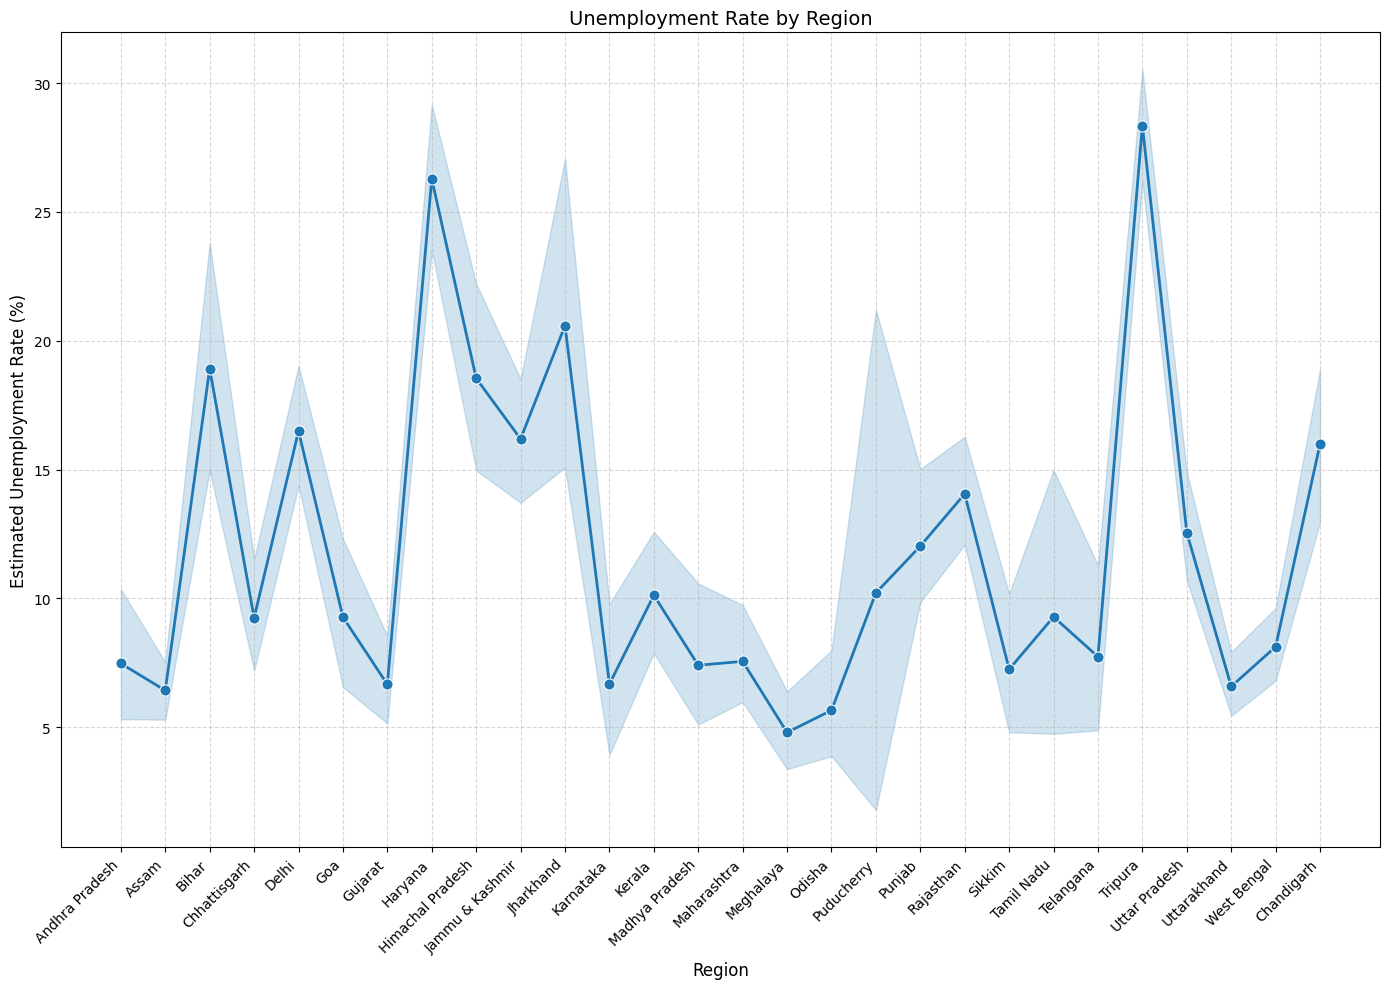

In [12]:
plt.figure(figsize=(14, 10))
sns.lineplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df, linewidth=2, marker='o', markersize=8)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.title('Unemployment Rate by Region', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

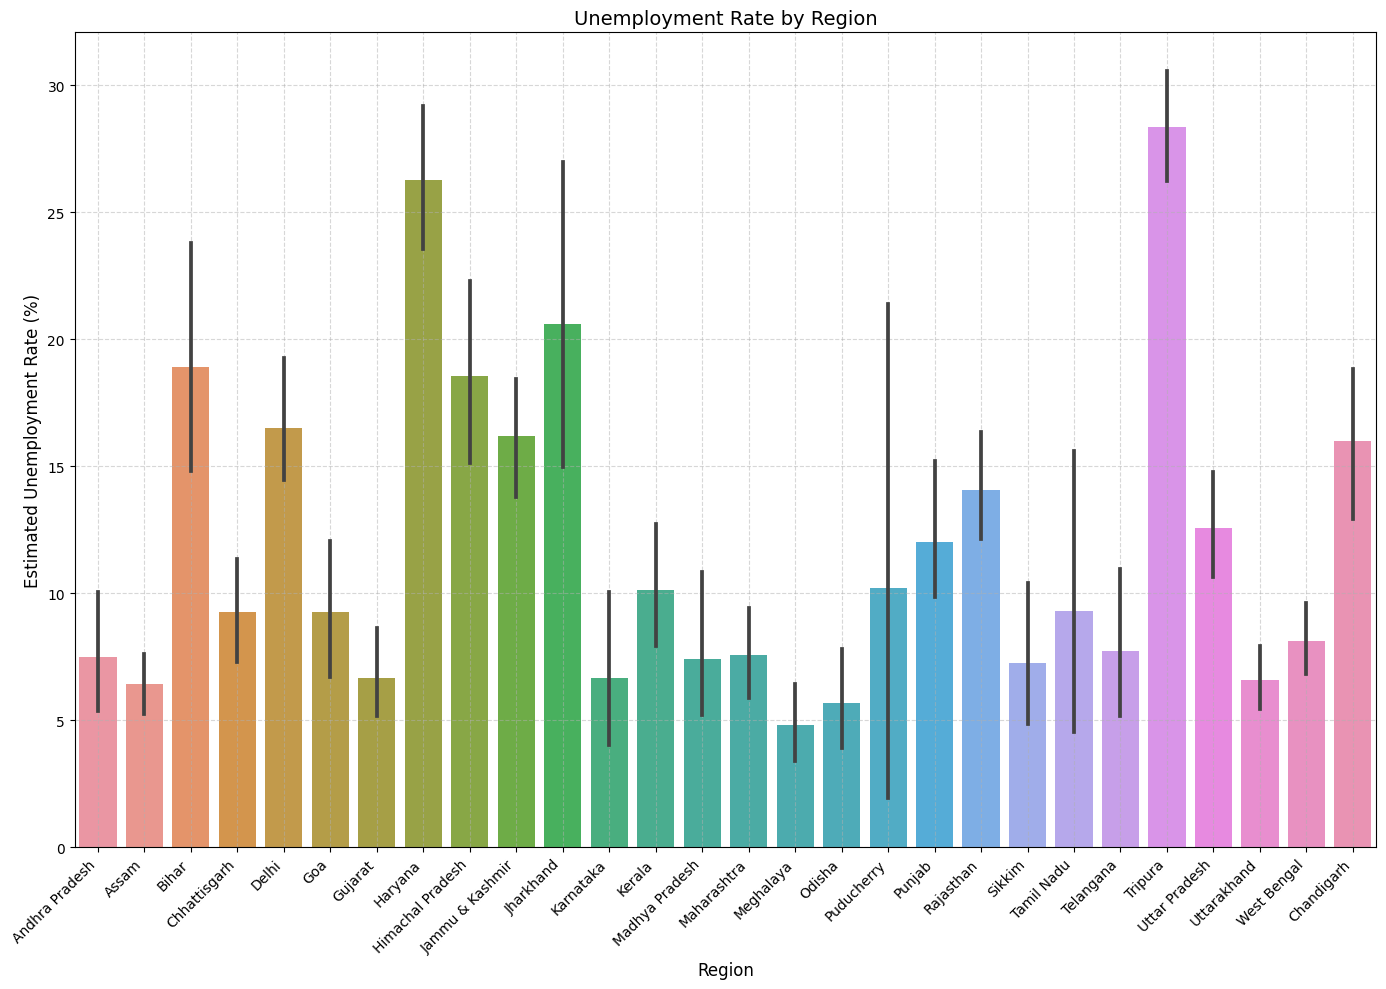

In [13]:
plt.figure(figsize=(14, 10))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.title('Unemployment Rate by Region', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

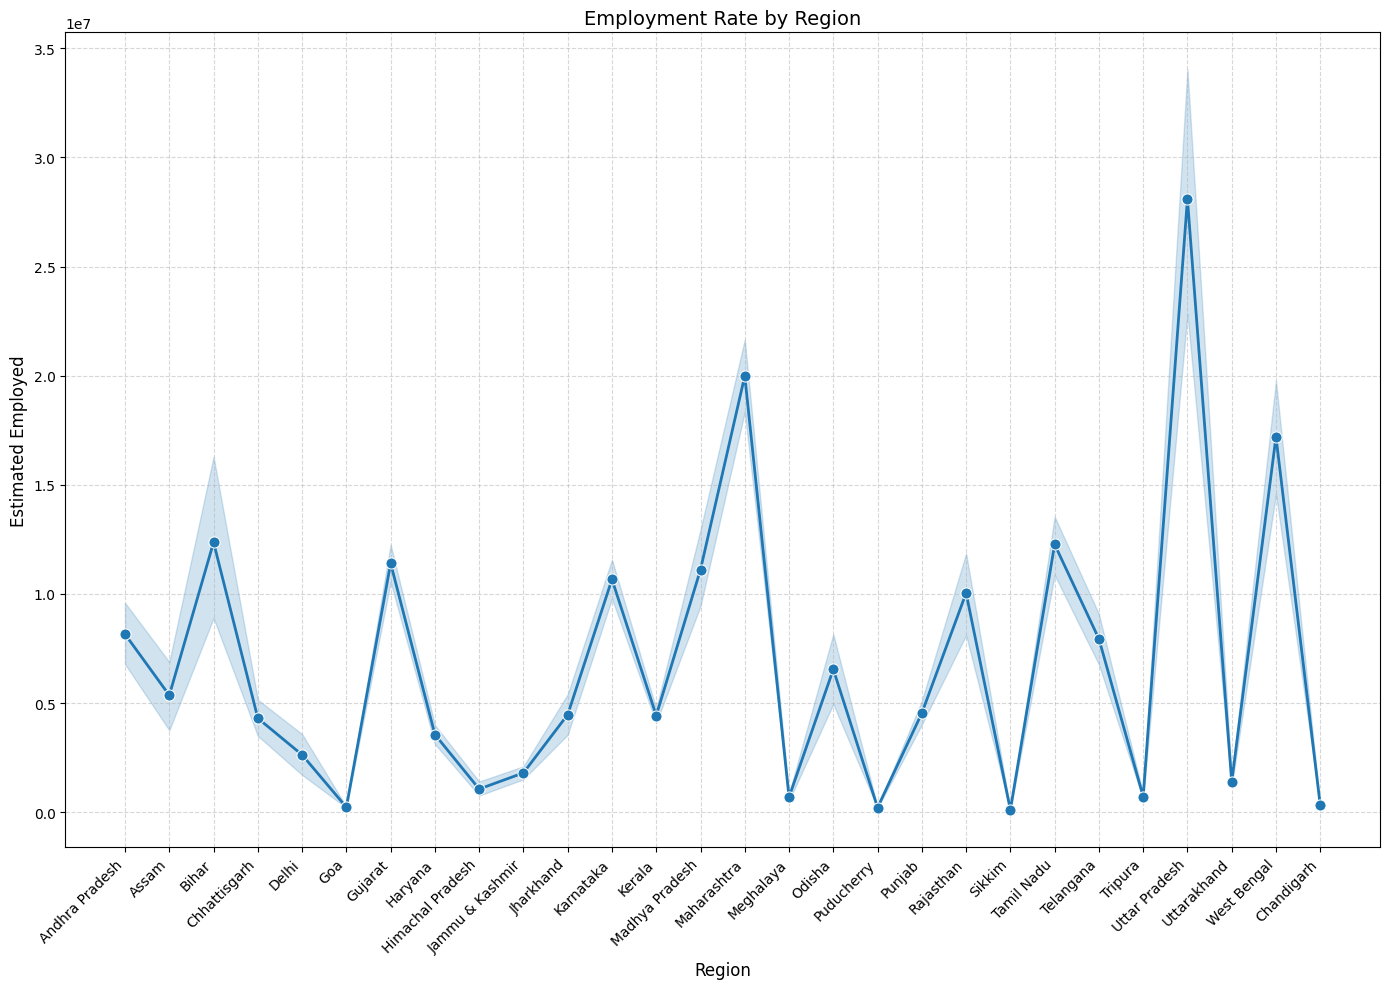

In [14]:
plt.figure(figsize=(14, 10))
sns.lineplot(x='Region', y=' Estimated Employed', data=df, linewidth=2, marker='o', markersize=8)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Estimated Employed', fontsize=12)
plt.title('Employment Rate by Region', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

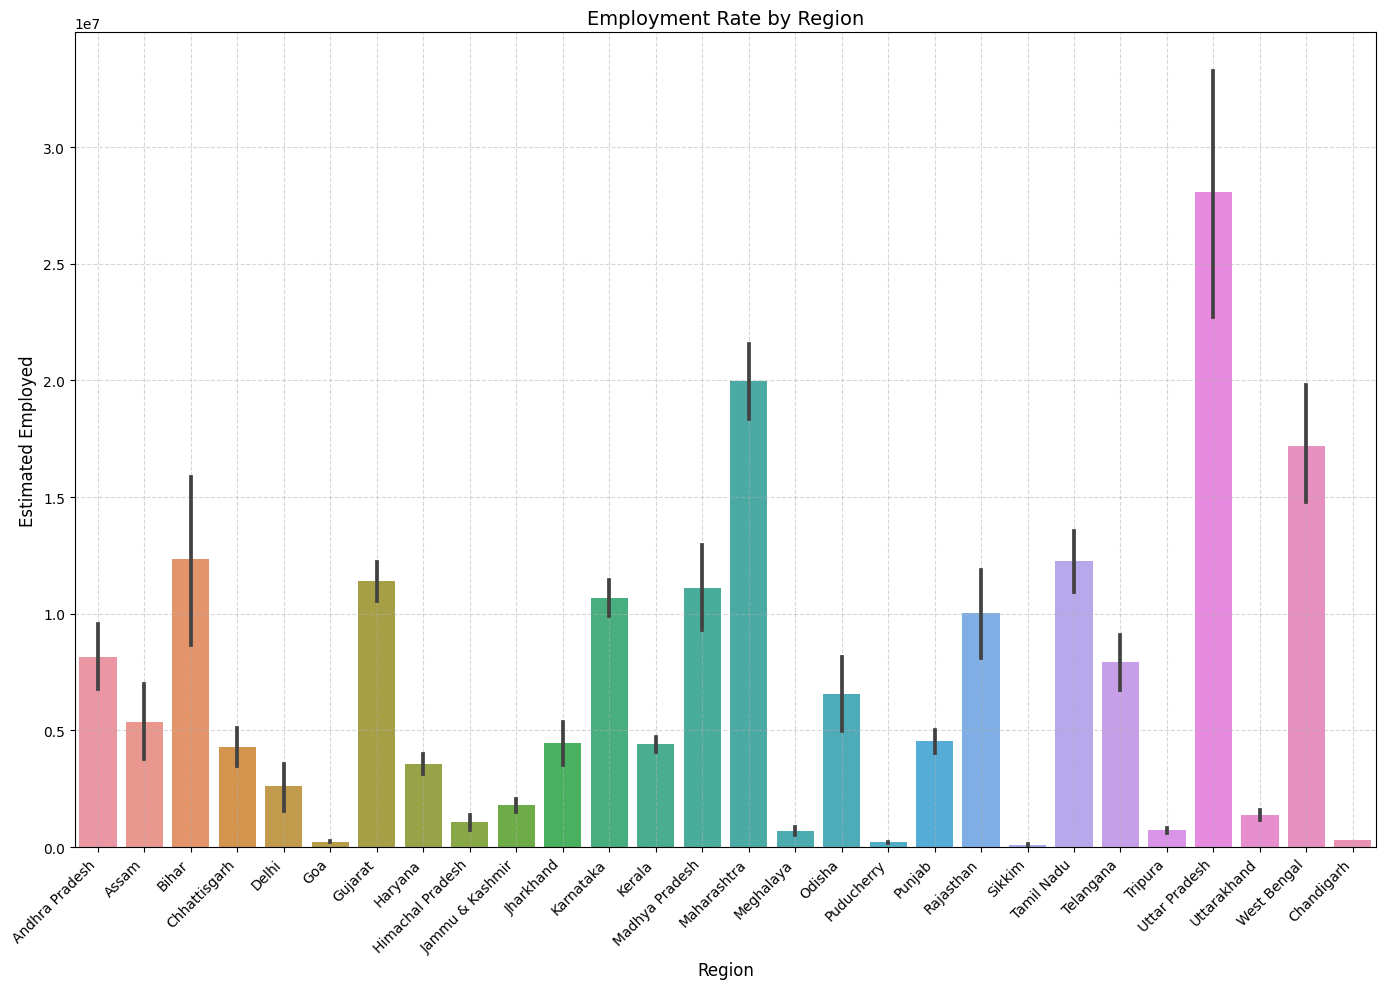

In [15]:
plt.figure(figsize=(14, 10))
sns.barplot(x='Region', y=' Estimated Employed', data=df)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Estimated Employed', fontsize=12)
plt.title('Employment Rate by Region', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

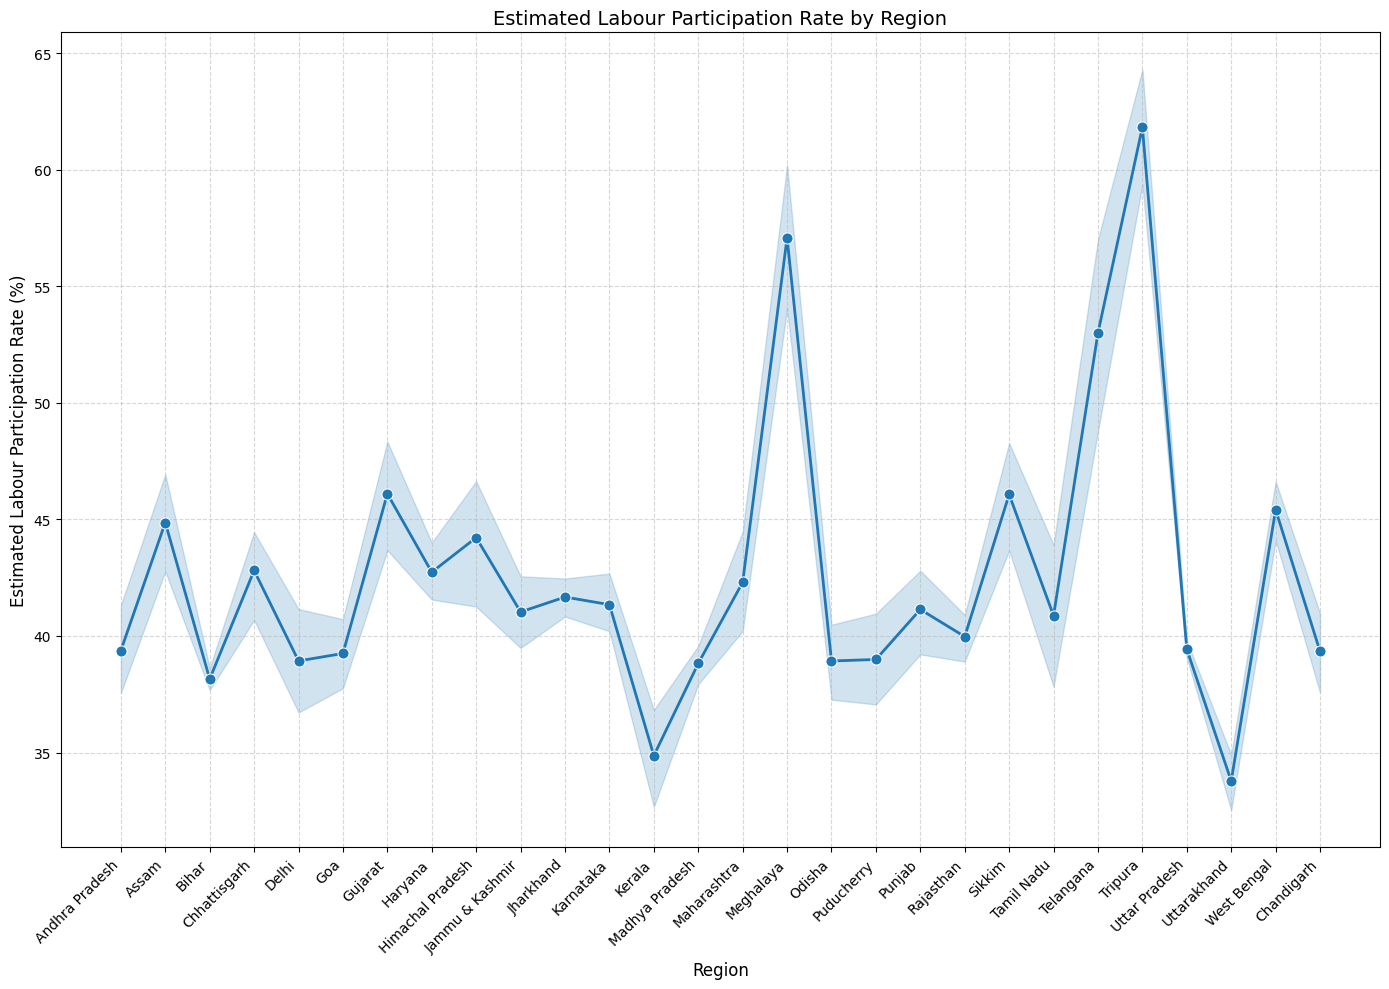

In [16]:
plt.figure(figsize=(14, 10))
sns.lineplot(x='Region', y=' Estimated Labour Participation Rate (%)', data=df, linewidth=2, marker='o', markersize=8)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Estimated Labour Participation Rate (%)', fontsize=12)
plt.title('Estimated Labour Participation Rate by Region', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

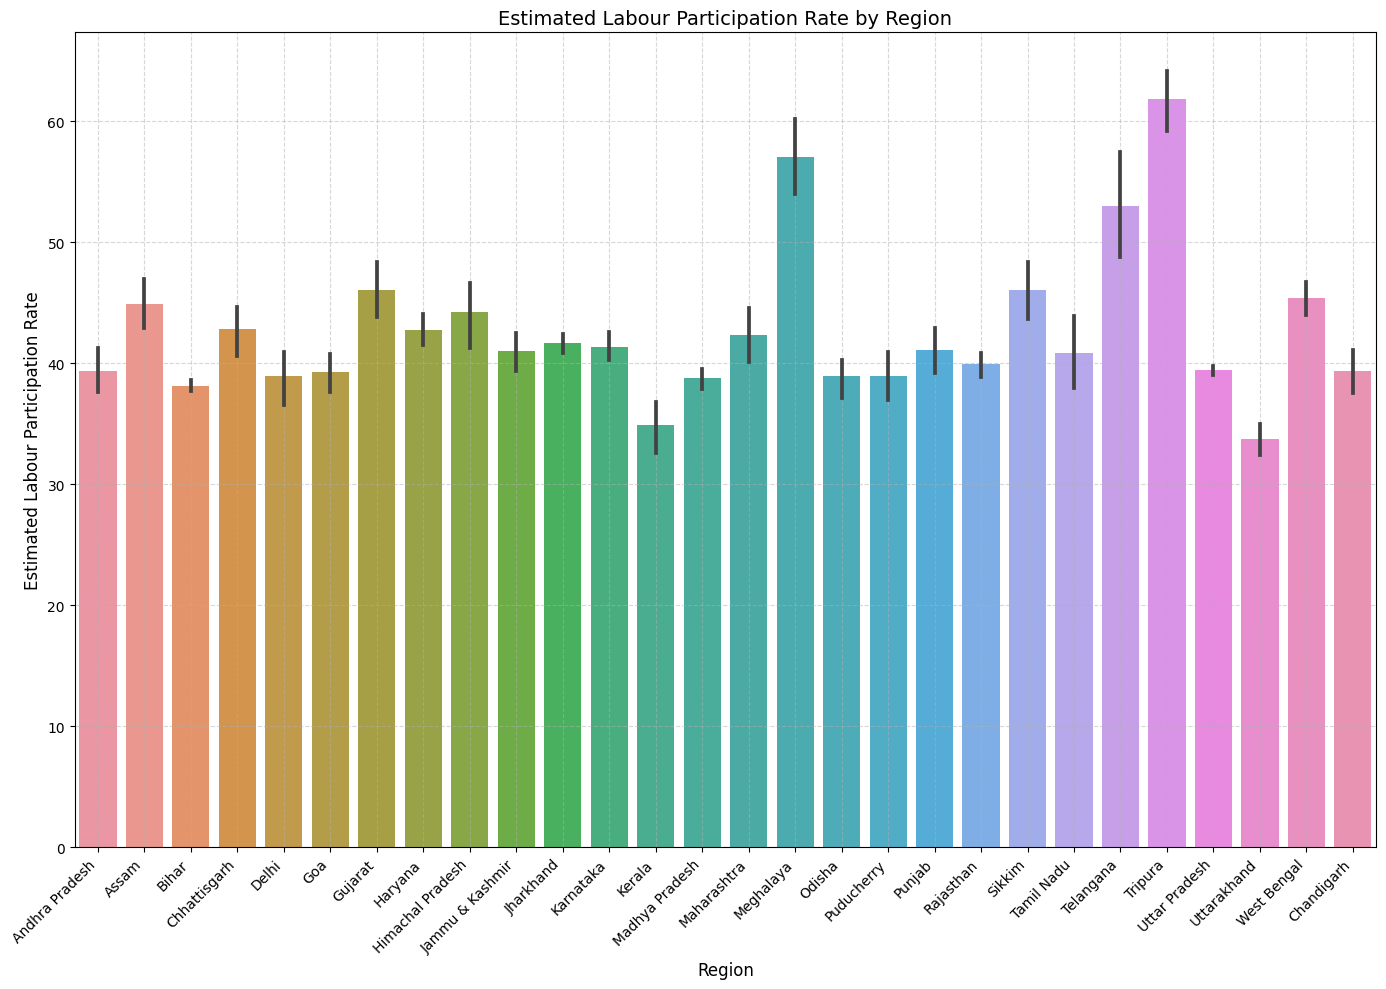

In [17]:
plt.figure(figsize=(14, 10))
sns.barplot(x='Region', y=' Estimated Labour Participation Rate (%)', data=df)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Estimated Labour Participation Rate', fontsize=12)
plt.title('Estimated Labour Participation Rate by Region', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

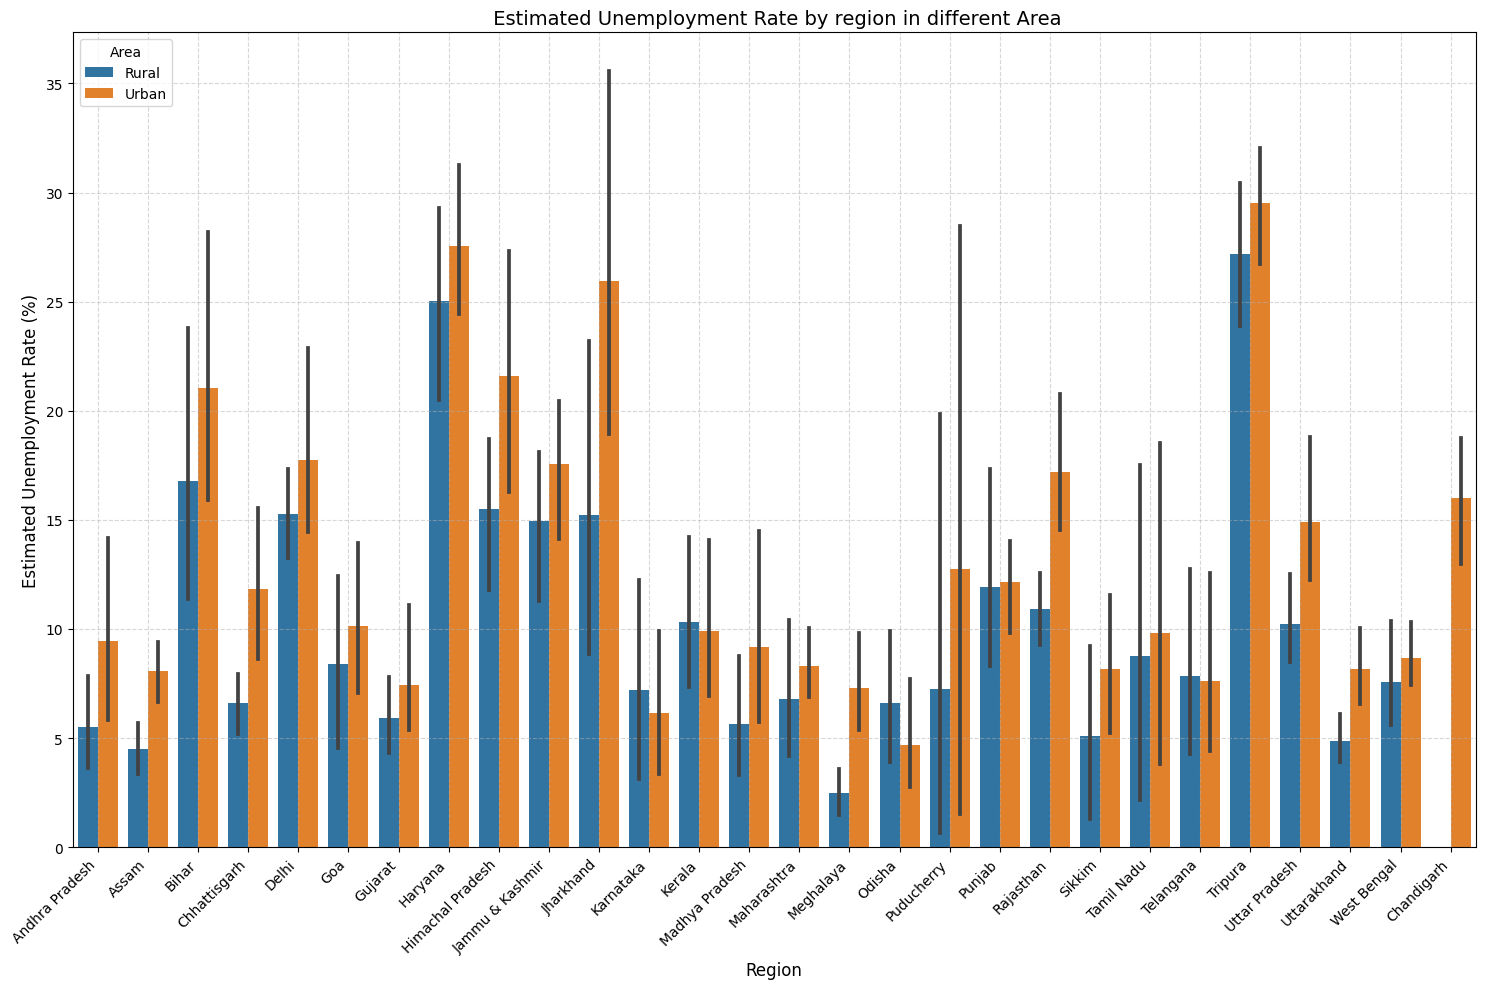

In [18]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Region', y=' Estimated Unemployment Rate (%)', hue= 'Area', data=df)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=12)
plt.title(' Estimated Unemployment Rate by region in different Area', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [19]:
df.drop(' Frequency', axis=1, inplace=True)

In [20]:
df

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
Date,,,,,,
2019-05-31,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
2019-06-30,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2019-07-31,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
2019-08-31,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
2019-09-30,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...
2020-02-29,West Bengal,29-02-2020,7.55,10871168.0,44.09,Urban
2020-03-31,West Bengal,31-03-2020,6.67,10806105.0,43.34,Urban
2020-04-30,West Bengal,30-04-2020,15.63,9299466.0,41.20,Urban


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [22]:
X = df.drop(' Estimated Unemployment Rate (%)', axis=1)  # Input features
y = df[' Estimated Unemployment Rate (%)']  # Target variable


In [24]:
df.columns

Index(['Region', ' Date', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [27]:
# Drop the 'Date' column
df = df.drop(' Date', axis=1)

# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Identify categorical columns
categorical_cols = ['Region', 'Area']

# Convert categorical columns to numeric using one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(df[categorical_cols])

# Concatenate the encoded categorical columns with the remaining numeric columns
X = np.concatenate((X_encoded, df.drop(categorical_cols, axis=1).values), axis=1)

C:\Users\SANKET\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.9624511662193204e-21


In [32]:
from sklearn.metrics import r2_score

# Assuming y_true contains the actual values and y_pred contains the predicted values
r2 = r2_score(y_test, y_pred)


In [33]:
print('r2 Score:', r2)

r2 Score: 1.0
